In [1]:
import rioxarray as rx
import xarray as xr
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = ['Times New Roman + SimSun + Nowar Sans GB18030', ]  # 设置字体 simhei, Heiti TC
font_name = "Times New Roman + SimSun + Nowar Sans GB18030"

In [2]:
import os
os.chdir(r"/Volumes/2TMyRes/SynologyDrive/SCI/BeijingHeatExposure")

In [3]:
# study area
bj = gpd.read_file('./边界数据/研究区/五环.shp')

In [4]:
lst_path = './LST/LST.tif'
lst30m = rx.open_rasterio(lst_path) 

In [5]:
lst30m.rio.transform() # 30m resolution

Affine(0.00026949458523585647, 0.0, 115.9910084746831,
       0.0, -0.00026949458523585647, 40.22260583562205)

In [6]:
# Convert to Celsius
lst30m_c = lst30m * 0.00341802 + 149 - 273.15

# clip
lst30m_c = lst30m_c.rio.clip(bj.geometry)

In [7]:
# https://danielp.users.earthengine.app/view/lst-downscaling

lst10m = rx.open_rasterio('./LST/Downscaled_LST_usingS2_10m.tif')
lst10m_c = lst10m.rio.clip(bj.geometry)
lst10m_c.rio.transform() # 10m resolution

Affine(8.98315284119541e-05, 0.0, 116.20184307186594,
       0.0, -8.983152841195212e-05, 40.02192220114974)

In [10]:
import northarrow_new
import contextily as cx

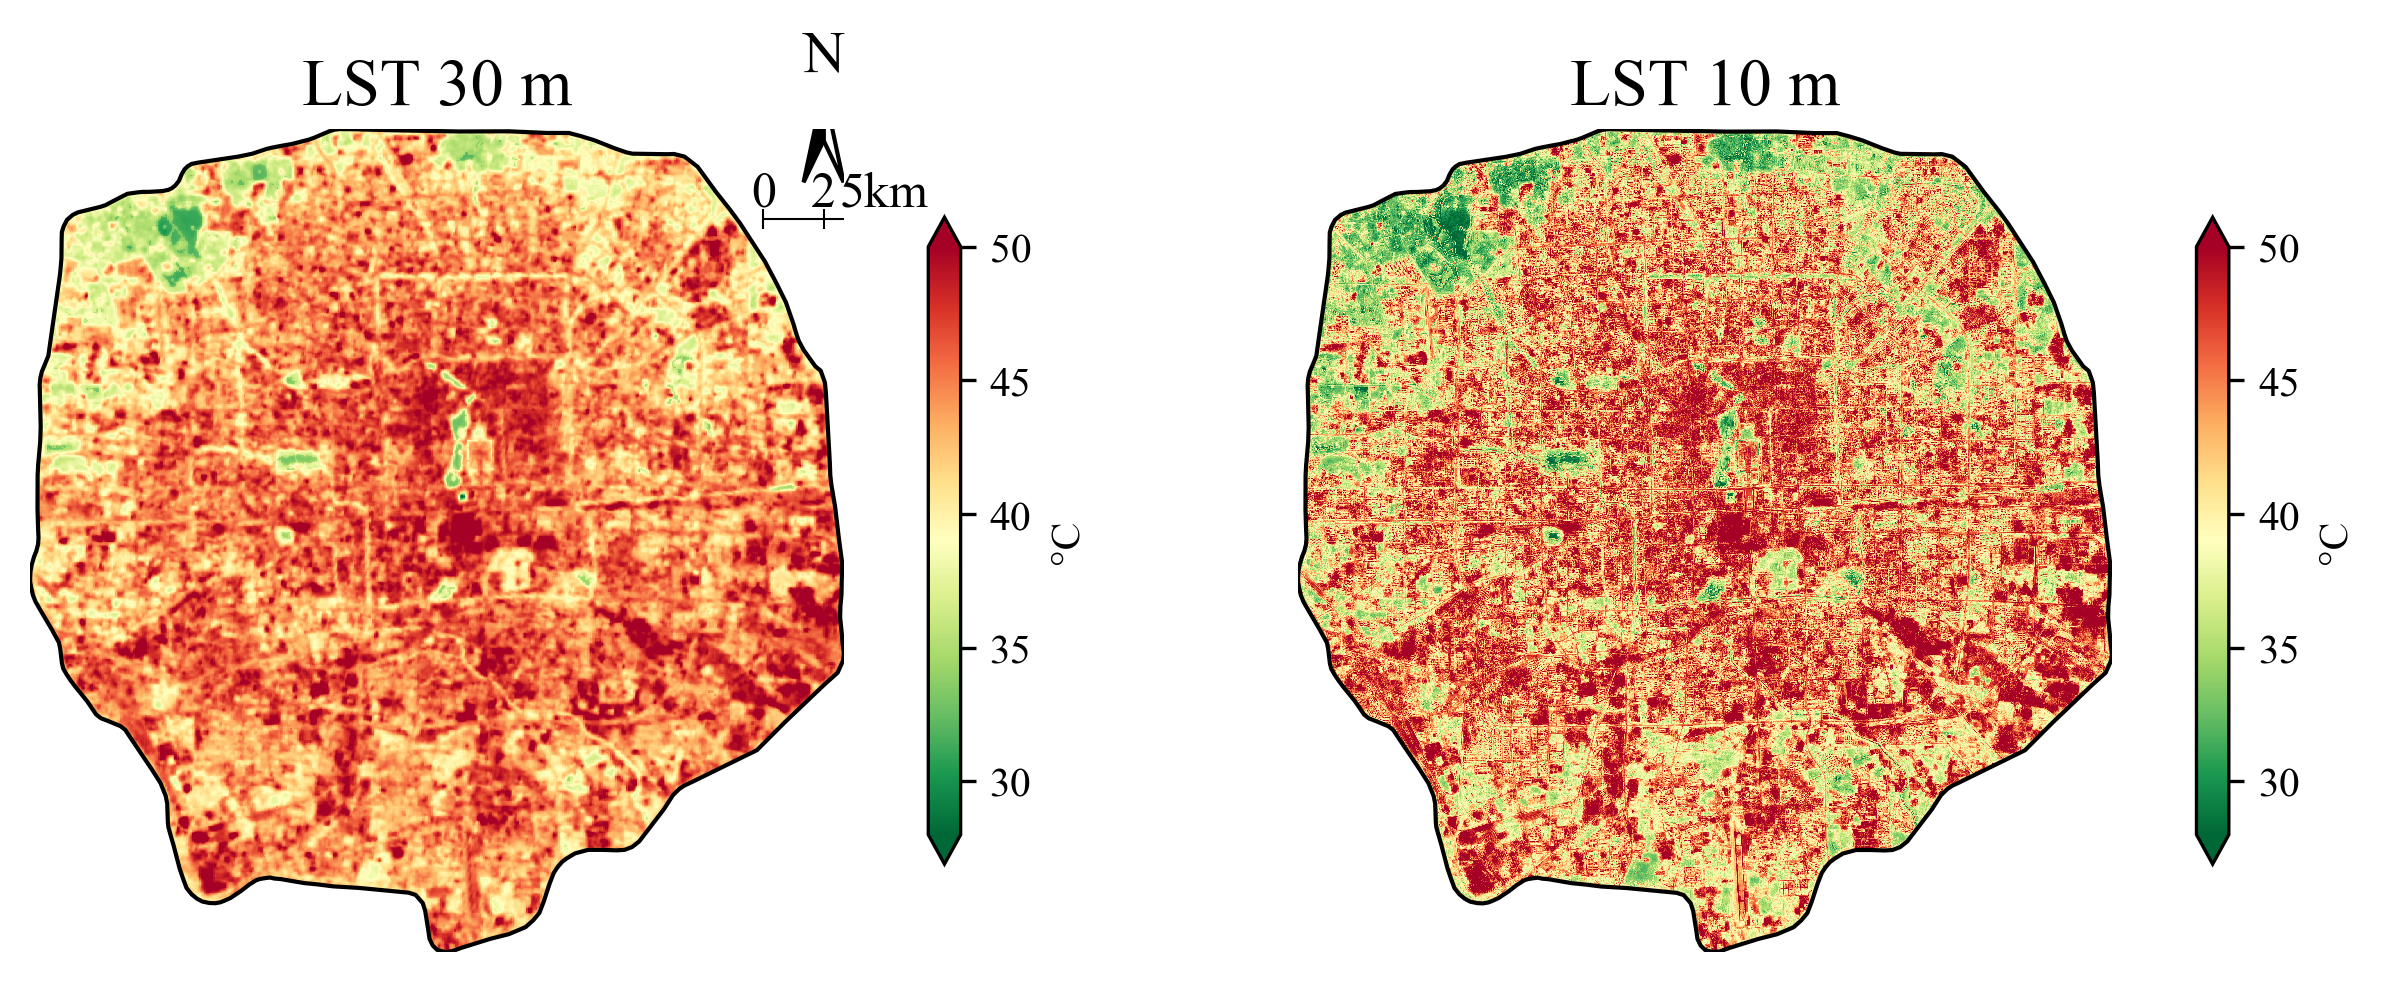

In [12]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,7),dpi=300)

lst30m_c.plot(cmap='RdYlGn_r', ax=ax, vmax=50, vmin=28,
           cbar_kwargs={'shrink': 0.4, 'label': '°C', 'pad': 0.08})
bj.plot(ax=ax, facecolor='none', lw=1)
ax.set_title('LST 30 m', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.axis('off')

lst10m_c.plot(cmap='RdYlGn_r', ax=ax2, vmax=50, vmin=28,
           cbar_kwargs={'shrink': 0.4, 'label': '°C', 'pad': 0.08})
bj.plot(ax=ax2, facecolor='none', lw=1)
ax2.set_title('LST 10 m', fontsize=16)
ax.set_xlabel('')
ax2.set_ylabel('')
ax2.axis('off')

northarrow_new.add_scalebar_geo(gdf_geo=bj, length=2500, lng=116.51, lat=40-0.007, ax=ax,
                                sub=8, divd=6, lw=0.5
                                )

plt.savefig(f'./SavedFig4/LST-30-and-10.png', bbox_inches='tight',dpi=300)
plt.show()